In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV

In [34]:
# Read the data

train_data_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/MyDataSplit/London_UTD19_train_0.csv'
test_data_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/MyDataSplit/London_UTD19_test_0.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
train_data = train_data.drop('day', axis=1)
test_data = test_data.drop('day', axis=1)

In [35]:
train_data

,interval,detid,weekday,traffic
0,0,CNTR_N00/005b1,Friday,6.0
1,300,CNTR_N00/005b1,Friday,3.0
2,600,CNTR_N00/005b1,Friday,5.0
3,900,CNTR_N00/005b1,Friday,4.0
4,1200,CNTR_N00/005b1,Friday,2.0
...,...,...,...,...
32670336,84900,SOUT_N32/999b4,Sunday,0.0
32670337,85200,SOUT_N32/999b4,Sunday,0.0
32670338,85500,SOUT_N32/999b4,Sunday,0.0
32670339,85800,SOUT_N32/999b4,Sunday,0.0


In [36]:
train_data['detid'].unique()[6]

'CNTR_N01/001c1'

## RFR Regression model for one Sensor

In [37]:
# Methods

def weekday_to_interval(df):
    weekday_to_num = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
    seconds_per_day = 86400
    df['interval'] = df.apply(lambda row: row['interval'] + (weekday_to_num[row['weekday']] * seconds_per_day), axis=1)
    df = df.drop(columns=['weekday'])
    return df

In [38]:
# Split dataframe by sensor
train_detid_dfs = {detid: data for detid, data in train_data.groupby('detid')}
test_detid_dfs = {detid: data for detid, data in test_data.groupby('detid')}

In [39]:
train_sensor1_data = train_detid_dfs['CNTR_N01/405b1']
train_sensor1_data = train_sensor1_data.drop('detid', axis=1)
train_sensor1_data = weekday_to_interval(train_sensor1_data)


test_sensor1_data = test_detid_dfs['CNTR_N01/405b1']
test_sensor1_data = test_sensor1_data.drop('detid', axis=1)
test_sensor1_data = weekday_to_interval(test_sensor1_data)


In [40]:
X_train = train_sensor1_data.drop(['traffic'], axis=1)
y_train = train_sensor1_data['traffic']

X_test = test_sensor1_data.drop(['traffic'], axis=1)
y_test = test_sensor1_data['traffic']

In [41]:
rfr = RandomForestRegressor(random_state=27)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=27)

In [42]:
y_pred = rfr.predict(X_test)
print('Mean absolute error: ' + str(mean_absolute_error(y_pred, y_test)))
print('Mean squared error: ' + str(mean_squared_error(y_pred, y_test)))
print('R2: ' + str(r2_score(y_pred, y_test)))

Mean absolute error: 10.69503363490442
Mean squared error: 239.03633425433566
R2: 0.4616055463931913


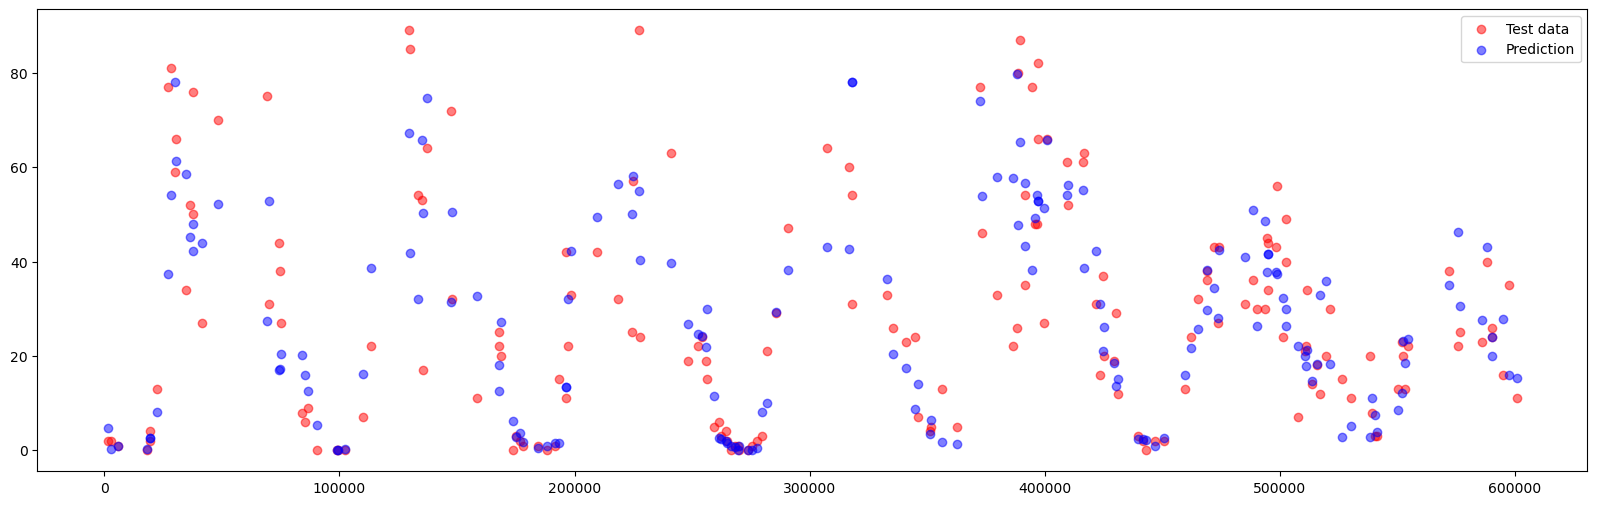

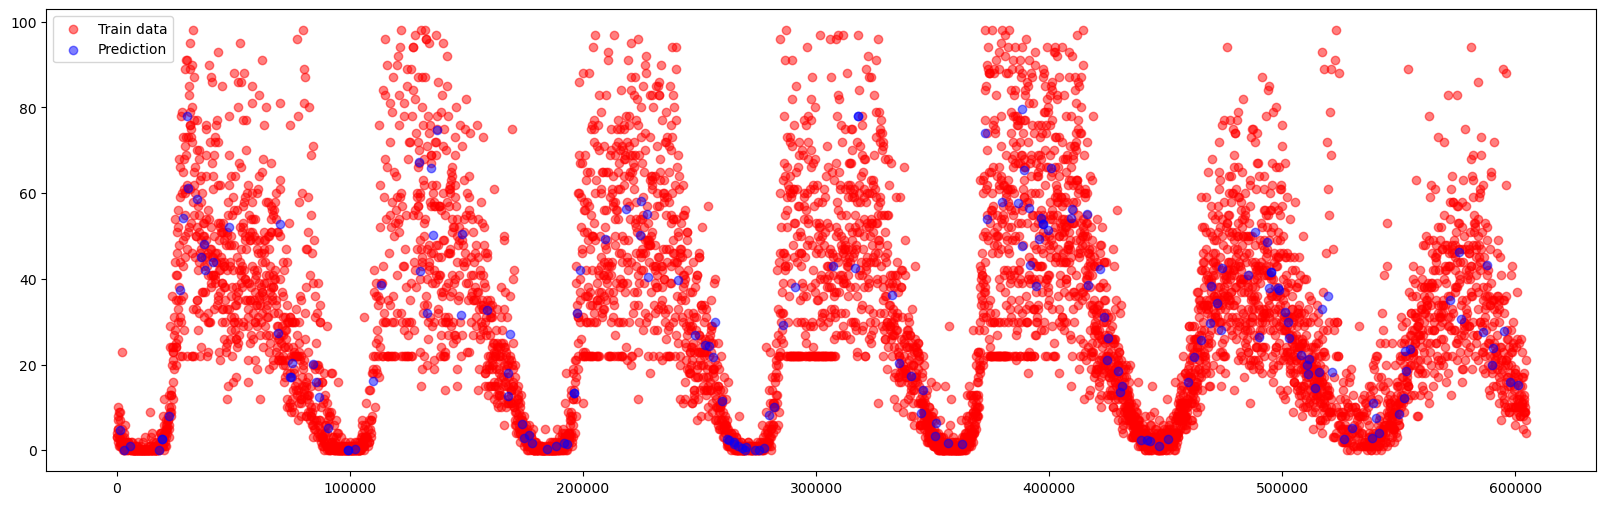

In [43]:
plt.figure(figsize=(20,6))
plt.scatter(X_test, y_test, alpha=0.5, color='red', label='Test data')
plt.scatter(X_test, y_pred, alpha=0.5, color='blue', label='Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(X_train, y_train, alpha=0.5, color='red', label='Train data')
plt.scatter(X_test, y_pred, alpha=0.5, color='blue', label='Prediction')
plt.legend()    
plt.show()

In [44]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [45]:
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, n_jobs=-1)

In [46]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=27), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [47]:
y_pred = rfr_cv.predict(X_test)
print('Mean absolute error: ' + str(mean_absolute_error(y_pred, y_test)))
print('Mean squared error: ' + str(mean_squared_error(y_pred, y_test)))
print('R2: ' + str(r2_score(y_pred, y_test)))

Mean absolute error: 9.661069639373654
Mean squared error: 178.3062382041144
R2: 0.4835090807495479


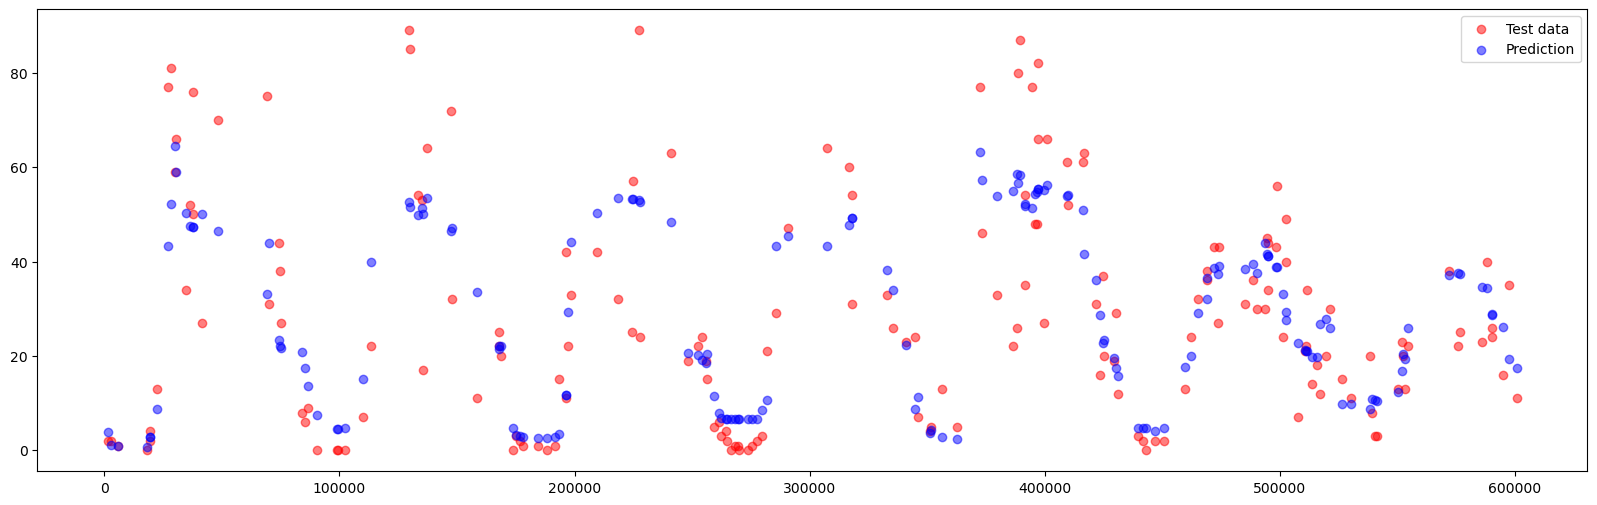

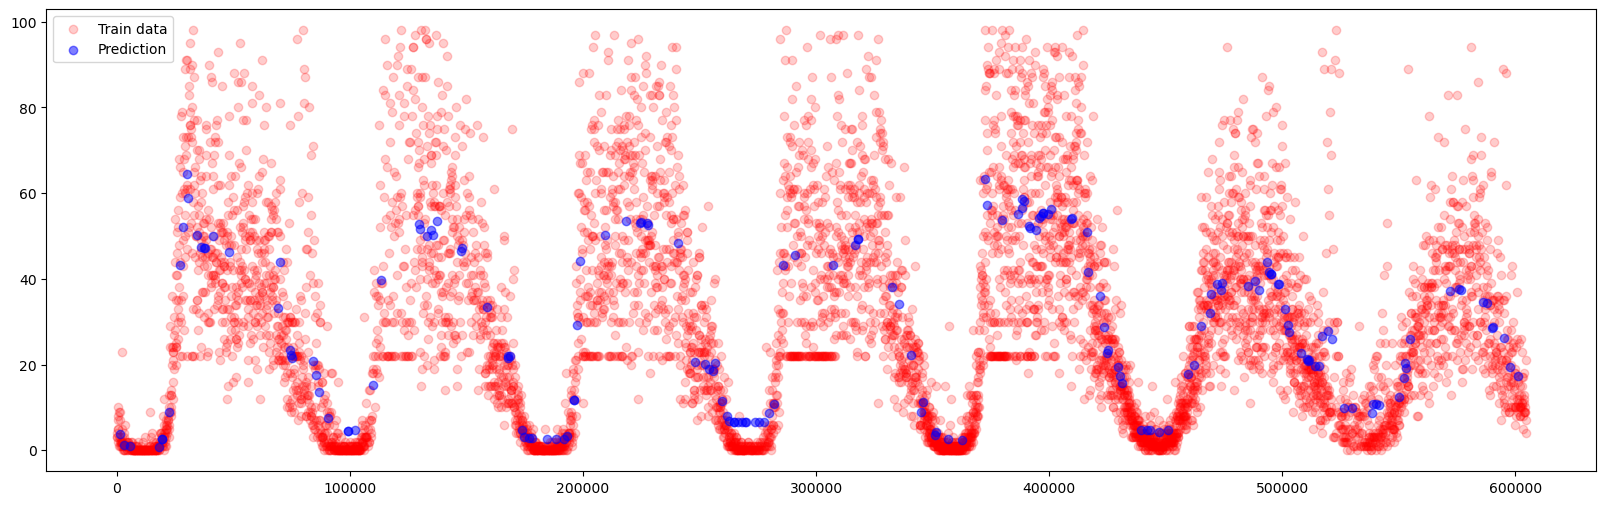

In [48]:
plt.figure(figsize=(20,6))
plt.scatter(X_test, y_test, alpha=0.5, color='red', label='Test data')
plt.scatter(X_test, y_pred, alpha=0.5, color='blue', label='Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(X_train, y_train, alpha=0.2, color='red', label='Train data')
plt.scatter(X_test, y_pred, alpha=0.5, color='blue', label='Prediction')
plt.legend()
plt.show()

